In [ ]:
from matplotlib import image
import numpy as np
import requests
import tarfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy.io
import scipy.misc
import cv2
from glob import glob
from PIL import Image
import math
from math import log
from copy import deepcopy
from scipy.spatial.distance import cdist 
from sklearn.metrics.cluster import completeness_score
from sklearn import metrics
from sklearn.cluster import SpectralClustering
from collections import defaultdict
import bottleneck

# 1-

In [ ]:
url = 'http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz'
r = requests.get(url, allow_redirects=True)
open('BSR_bsds500.tgz', 'wb').write(r.content)
filename = "BSR_bsds500.tgz"
tf = tarfile.open(filename)
tf.extractall('/content/data')

In [ ]:
tr_img = []
te_img = []
v_img = []

tr_gt = []
te_gt = []
v_gt = []

train_Names=glob('/content/data/BSR/BSDS500/data/images/train/*.jpg')
test_Names=glob('/content/data/BSR/BSDS500/data/images/test/*.jpg')
val_Names=glob('/content/data/BSR/BSDS500/data/images/val/*.jpg')

train_Names=sorted(train_Names)
test_Names=sorted(test_Names)
val_Names=sorted(val_Names)

train_GT=glob('/content/data/BSR/BSDS500/data/groundTruth/train/*.mat')
test_GT=glob('/content/data/BSR/BSDS500/data/groundTruth/test/*.mat')
val_GT=glob('/content/data/BSR/BSDS500/data/groundTruth/val/*.mat')

train_GT=sorted(train_GT)
test_GT=sorted(test_GT)
val_GT=sorted(val_GT)


## for training 
for k in range(len(train_Names)):
  tr_img.append(imread(train_Names[k]))
  # returns a directory which have "groundtruth" as a key to a list of arrays 
  GT_Tr_D = scipy.io.loadmat(train_GT[k])
  data=GT_Tr_D['groundTruth'][0][:]
  temp = [] 

  for j in range(data.size):
    temp.append(np.ravel(data[j][0][0][0]))
  temp=np.array(temp) 
  tr_gt.append(temp)

tr_img=np.array(tr_img)


#### for testing 
for k in range(len(test_Names)):
  te_img.append(imread(test_Names[k]))
  GT_Ts_D = scipy.io.loadmat(test_GT[k])
  data=GT_Ts_D['groundTruth'][0][:]
  temp = [] 

  for j in range(data.size):
    temp.append(np.ravel(data[j][0][0][0]))
  temp=np.array(temp) 
  te_gt.append(temp)
  

te_img=np.array(te_img)

#### for evaluation 
for k in range(len(val_Names)):
  v_img.append(imread(test_Names[k]))
  GT_V_D = scipy.io.loadmat(val_GT[k])
  data=GT_V_D['groundTruth'][0][:]
  temp = [] 

  for j in range(data.size):
    temp.append(np.ravel(data[j][0][0][0]))
  temp=np.array(temp) 
  v_gt.append(temp)

v_img=np.array(v_img)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# 2-

In [ ]:
def ShowImageAndGroundTruth(images,groundtruth,index):
  plt.imshow(images[index])
  plt.show()
  for j in range(len(groundtruth[index])):
    if images[index].shape[0]==481:
      plt.imshow(groundtruth[index][j].reshape((481, 321)))
      plt.show()
    else : 
      plt.imshow(groundtruth[index][j].reshape((321, 481)))
      plt.show() 

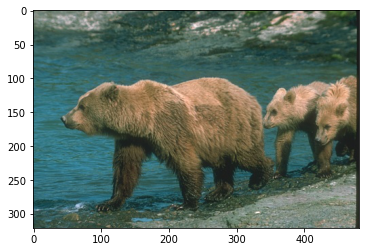

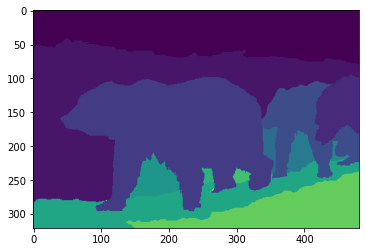

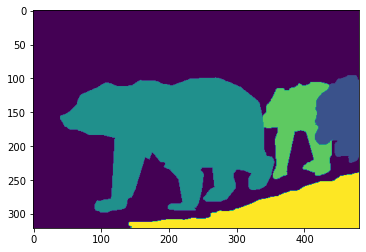

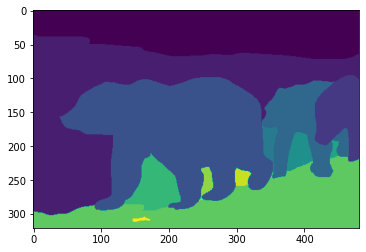

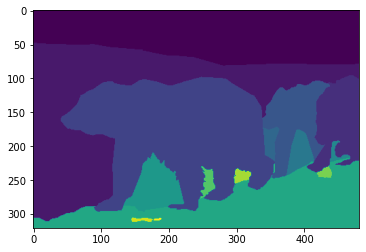

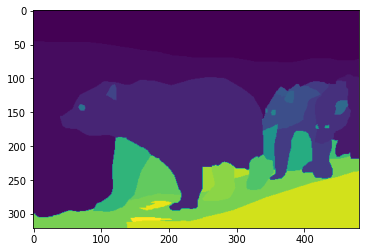

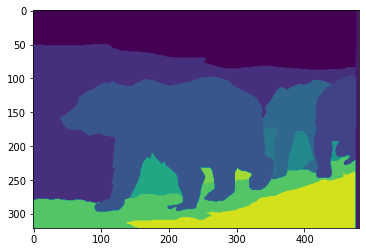

In [ ]:
ShowImageAndGroundTruth(tr_img,tr_gt,0)

#3-  K-means

In [ ]:
def Kmeans (data,K=3,maxitr=100,spatial=False):
 
  h = data.shape[0]
  w = data.shape[1]
  data=data.reshape(-1, data.shape[-1])
  normalization_parameters = np.array([255, 255, 255])
  
  if spatial:
    data = np.append(data, [(x, y) for x in range(h) for y in range(w)], axis = 1)
    normalization_parameters = np.array([255, 255, 255, h, w])

  data = data / normalization_parameters  

  n = data.shape[0]
  c = data.shape[1]
  idx = np.random.choice(len(data), K, replace=False)

  centroids = data[idx, :]
  numofitr=0
  error=1000
  while error > 0.001 and numofitr<maxitr:
    dist=cdist(data, centroids ,'euclidean')
    numofitr+=1
    cluster=np.argmin(dist,axis=1)
    Newcentroids=np.zeros((K,c))
    for i in range(K):
      if data[cluster==i].size>1:
        Newcentroids[i]=np.mean(data[cluster==i],axis=0)
      else:
        Newcentroids[i]=centroids[i]
    error = np.linalg.norm(Newcentroids - centroids)
    centroids = deepcopy(Newcentroids)
  colored_image=centroids[cluster]
  colored_image=colored_image[:,0:3]
  cluster=cluster+1
  return colored_image,cluster

In [ ]:
def numofclasses(groundtruth,index):
  num=np.zeros(len(groundtruth[index]))
  for j in range(len(groundtruth[index])):
    num[j]=max(groundtruth[index][j])
  return num

F_score

In [ ]:
def F_score(C,groundtruth):
  nt=C.shape[0]
  K=int(max(groundtruth))
  x=np.zeros((K,K))
  for i in range(1,K+1):
    u=groundtruth[(C==i)]
    for  j in range(1,K+1):
      h= np.count_nonzero(u == j)
      x[i-1][j-1]=h
  n=np.sum(x,axis=1)
  per=np.zeros(K)
  for i in range(K):
    per[i]=(1/n[i])*max(x[i])
  T=np.sum(x.T,axis=1)
  rec=np.zeros(K)
  for i in range(K):
    rec[i]=(1/T[np.argmax(x[i])])*max(x[i])
    F=2*(per*rec)/(per+rec)
  return np.mean(F)

entropy

In [ ]:
def logfunc(x,base):
  if x==0:
    return 0
  else:
    return log(x,base)

In [ ]:
def Entropy(C,groundtruth,base=np.exp(1)):
  K=int(max(groundtruth))
  nt=C.shape[0]
  x=np.zeros((K,K))
  for i in range(1,K+1):
    u=groundtruth[(C==i)]
    for j in range(1,K+1):
      h= np.count_nonzero(u == j)
      x[i-1][j-1]=h
  n=np.sum(x,axis=1)
  H=np.zeros(K)
  for i in range(K):
    for j in range(K):
       H[i]+=-(x[i][j]/n[i])*(logfunc(x[i][j]/n[i],base)) 
  return np.sum(H*n/nt)

In [ ]:
K=[3,5,7,9,11]
L=len(K)
size=tr_img.shape[0]
fscore=np.zeros((L,size))
ConEntropy=np.zeros((L,size))
segmentedImages =[[] for x in range(200)]
colored_segmentedImages =[[] for x in range(200)]
nf=np.zeros(L)
for i in range(tr_img.shape[0]):
  for j in range(L):
    colored_image,cluster=Kmeans(tr_img[i],K[j])
    segmentedImages[i].append(cluster)
    colored_segmentedImages[i].append(colored_image)
    index = np.where(numofclasses(tr_gt,i) == K[j])[0]
    if index.size==1:
      GT=tr_gt[i][index]
      GT=GT.reshape(154401,1)
      GT2=np.squeeze(GT)
      fscore[j][i]=F_score(cluster,GT2)
      ConEntropy[j][i]=Entropy(cluster,GT)
      nf[j]+=1


In [ ]:
ks=[3,5,7,9,11]
for i in range(5):
    print("Fscore For K equals "+str(ks[i]))
    print(fscore[i])
    print("\n")

for i in range(5):
    print("Entropy For K equals "+str(ks[i]))
    print(ConEntropy[i])
    print("\n")
print("Average Fscore of the training set "+str(np.sum(fscore,axis=1)/nf))
print("Average Entropy of the training set "+str(np.sum(ConEntropy,axis=1)/nf))
bestK=K[np.argmax(np.sum(fscore,axis=1)/nf)]

Fscore For K equals 3
[0.         0.         0.         0.         0.         0.
 0.         0.         0.71369958 0.         0.         0.
 0.         0.         0.63145161 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.46826142 0.         0.46268083 0.66448283 0.         0.48093369
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.61199236 0.76072308 0.         0.         0.
 0.         0.48499181 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.51316807
 0.         0.         0.         0.         0.         0.
 0.         0.    

In [ ]:
K=[3,5,7,9,11]
L=len(K)
size=v_img.shape[0]
v_fscore=np.zeros((L,size))
v_ConEntropy=np.zeros((L,size))
v_nf=np.zeros(L)
v_segmentedImages =[[] for x in range(100)]
for i in range(v_img.shape[0]):
  for j in range(L):
    colored_image,cluster=Kmeans(v_img[i],K[j])
    v_segmentedImages[i].append(cluster)
    index = np.where(numofclasses(v_gt,i) == K[j])[0]
    if index.size==1:
      GT=v_gt[i][index]
      GT=GT.reshape(154401,1)
      GT2=np.squeeze(GT)
      v_fscore[j][i]=F_score(cluster,GT2)
      v_ConEntropy[j][i]=Entropy(cluster,GT)
      v_nf[j]+=1
print(np.sum(v_fscore,axis=1)/v_nf)
print(np.sum(v_ConEntropy,axis=1)/v_nf)

[0.47314216 0.35995707 0.25229609 0.2266272  0.19007752]
[0.54792085 0.74786547 1.03562328 1.16742264 1.17053644]


In [ ]:
ks=[3,5,7,9,11]
for i in range(5):
    print("Fscore For K equals "+str(ks[i]))
    print(v_fscore[i])
    print("\n")

for i in range(5):
    print("Entropy For K equals "+str(ks[i]))
    print(v_ConEntropy[i])
    print("\n")


print("Average Fscore of the validation set "+str(np.sum(v_fscore,axis=1)/v_nf))
print("Average Entropy of the validation set "+str(np.sum(v_ConEntropy,axis=1)/v_nf))
if bestK==K[np.argmax(np.sum(v_fscore,axis=1)/v_nf)]:
  print("After validation Best K="+str(bestK))

Fscore For K equals 3
[0.         0.         0.         0.         0.         0.
 0.         0.48260189 0.46946389 0.         0.         0.43987915
 0.         0.         0.         0.48302986 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.42840935 0.         0.
 0.         0.         0.47129086 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.46144659 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.46871173 0.         0.
 0.4902368  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.5231397  0.         0.         0.         0.48165642
 0.         0.         0.         0.         0.         0.4687052
 0.         0.         0.         0.         0.         0.
 0.48227669

In [ ]:
size=50
te_fscore=np.zeros(size)
te_ConEntropy=np.zeros(size)
te_segmentedImages =[[] for x in range(50)]
for i in range(50):
  colored_image,cluster=Kmeans(te_img[i],bestK)
  te_segmentedImages[i].append(cluster)
  index = np.where(numofclasses(te_gt,i) == bestK)[0]
  if index.size==1:
    GT=te_gt[i][index]
    GT=GT.reshape(154401,1)
    GT2=np.squeeze(GT)
    te_fscore[i]=F_score(cluster,GT2)
    te_ConEntropy[i]=Entropy(cluster,GT)
te_fscore=te_fscore[np.where(te_fscore != 0)]
te_ConEntropy=te_ConEntropy[np.where(te_ConEntropy!=0)]
print("Average Fscore of the test set at K = "+str(bestK)+"  is "+str(np.mean(te_fscore)))
print("Average Entropy of the test set at K = "+str(bestK)+" is "+str(np.mean(te_ConEntropy)))

Average Fscore of the test set at K = 3  is 0.5277145632567565
Average Entropy of the test set at K = 3 is 0.6327684877057639


Good results
at K= 3
f_score: 0.7607230757408364


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


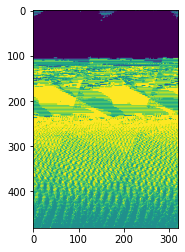

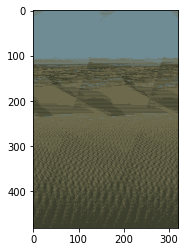

at K= 3
f_score: 0.7136995806269287


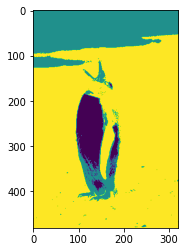

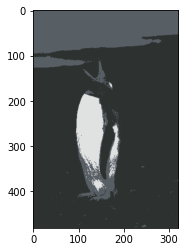

at K= 7
f_score: 0.706009044295897


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


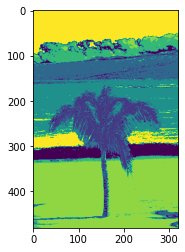

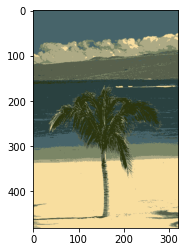

Bad results
at K= 7
f_score: 0.20451319252602632


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


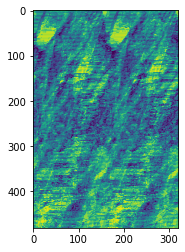

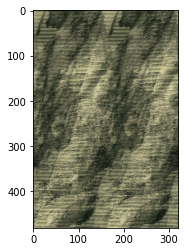

at K= 9
f_score: 0.18897568326590833


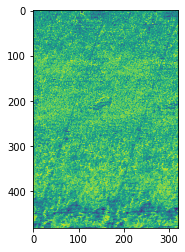

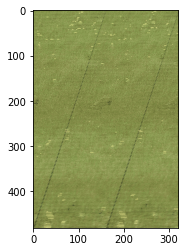

at K= 11
f_score: 0.2150063884018155


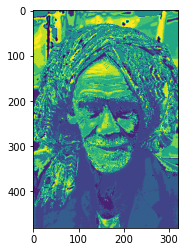

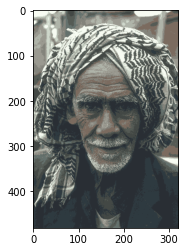

In [ ]:
#c Display good results and bad results
fscoreNONZERO=fscore[np.where(fscore != 0)]
ks=[3,5,7,9,11]
fscoreNONZERO = np.sort(fscoreNONZERO)
best3 = [[fscoreNONZERO[136]],[fscoreNONZERO[135]],[fscoreNONZERO[134]]]
bad3 = [[fscoreNONZERO[0]],[fscoreNONZERO[1]],[fscoreNONZERO[2]]]
# print(fscore)
indexofgood=-1
indexofbad=-1
print("Good results")
for i in range(5):
  for j in range(3):
    indexofgood=(np.where(fscore[i]==best3[j]))
    if indexofgood[0]:
      x = np.asscalar(indexofgood[0])
      print("at K= "+str(ks[i]))
      print("f_score: "+str(fscore[i][x]))
      plt.imshow(segmentedImages[x][i].reshape((481, 321)))
      
      plt.show() 
      plt.imshow(colored_segmentedImages[x][i].reshape((481, 321,3)))
      plt.show() 

print("Bad results")
for i in range(5):
  for j in range(3):
    indexofbad=(np.where(fscore[i]==bad3[j]))
    if indexofbad[0]:
      x = np.asscalar(indexofbad[0])
      print("at K= "+str(ks[i]))
      print("f_score: "+str(fscore[i][x]))
      plt.imshow(segmentedImages[x][i].reshape((481, 321)))
      plt.show() 
      plt.imshow(colored_segmentedImages[x][i].reshape((481, 321,3)))
      plt.show() 



# 4-

## a-

After K-means


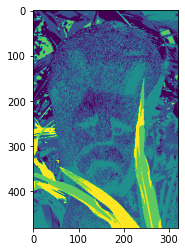

colored image


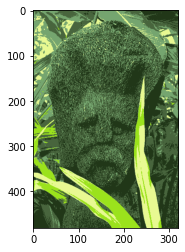

After K-means by spatial layout


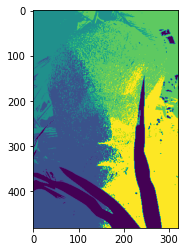

colored image


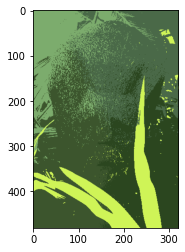

Image and her Groud truth


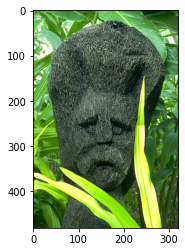

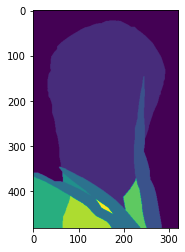

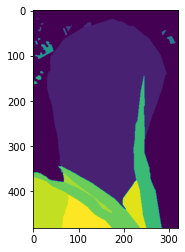

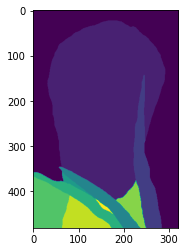

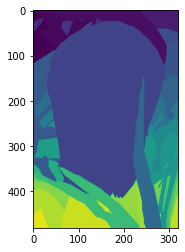

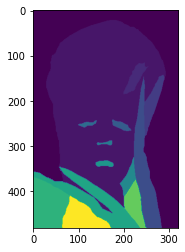

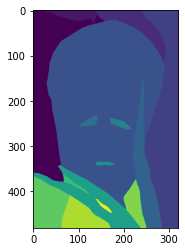

In [ ]:
index=5
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
colored,cluster=Kmeans(te_img[index],5,spatial=True)
print("After K-means by spatial layout")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

After K-means


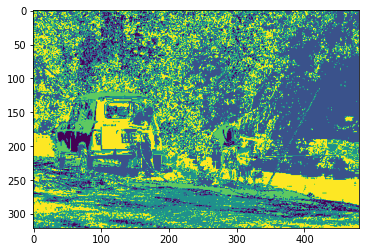

colored image


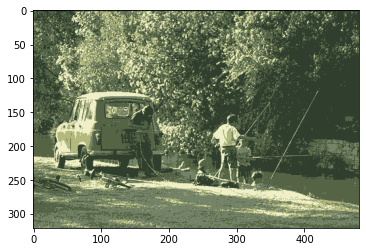

After K-means by spatial layout


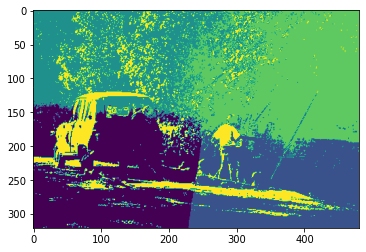

colored image


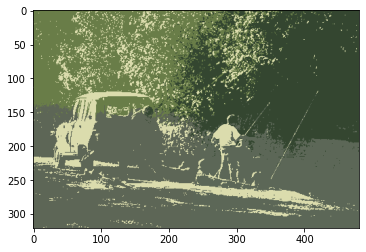

Image and her Groud truth


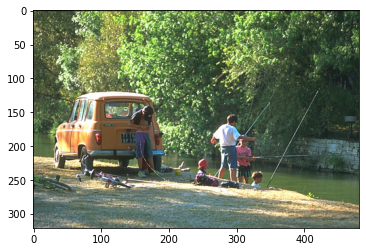

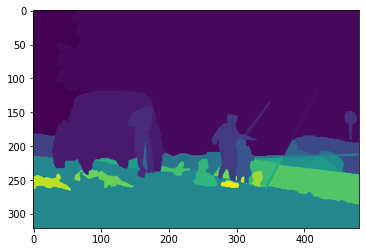

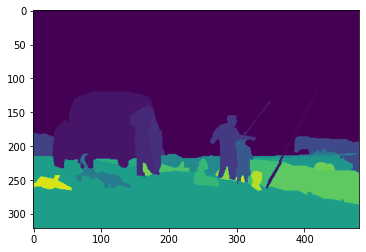

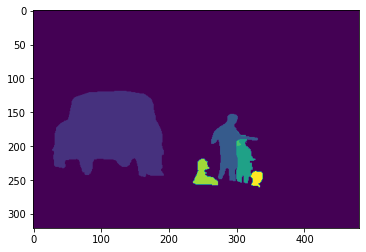

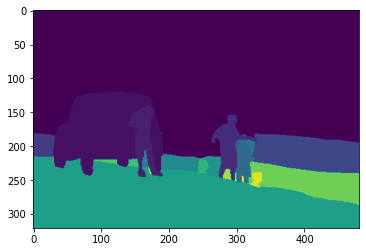

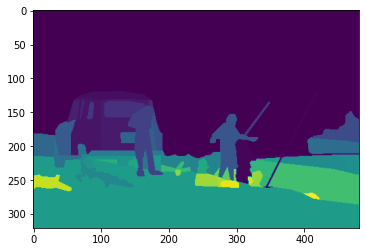

In [ ]:
index=6
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
colored,cluster=Kmeans(te_img[index],5,spatial=True)
print("After K-means by spatial layout")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

After K-means


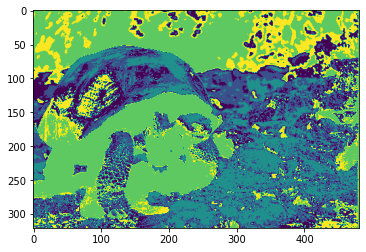

colored image


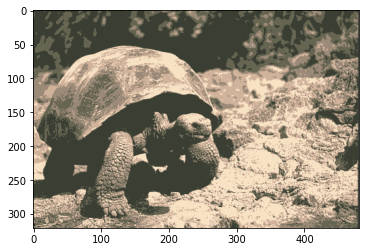

After K-means by spatial layout


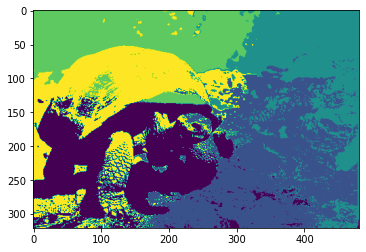

colored image


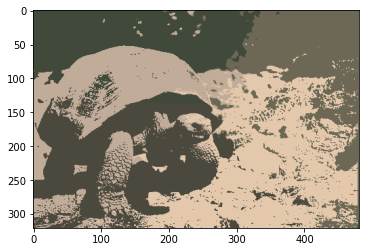

Image and her Groud truth


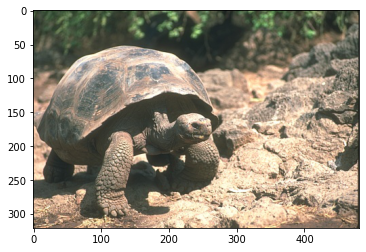

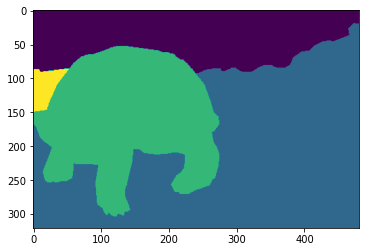

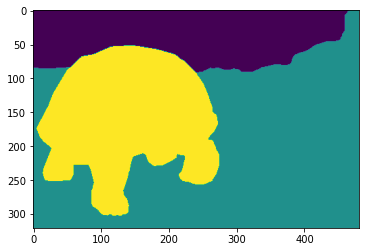

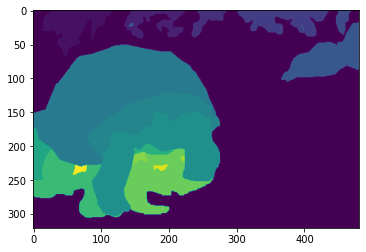

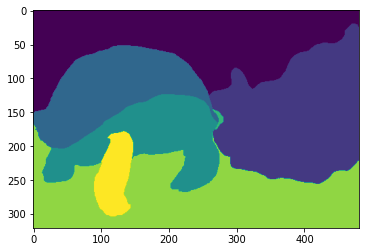

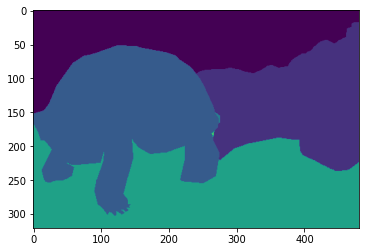

In [ ]:
index=7
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
colored,cluster=Kmeans(te_img[index],5,spatial=True)
print("After K-means by spatial layout")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

After K-means


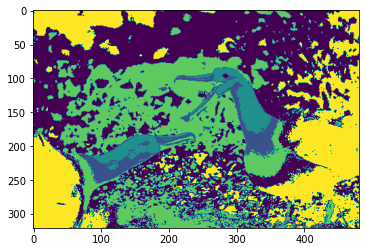

colored image


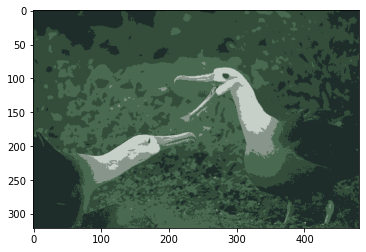

After K-means by spatial layout


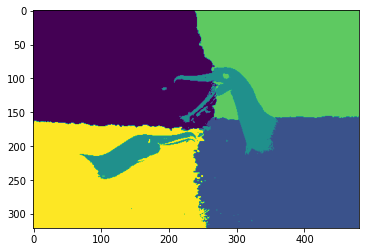

colored image


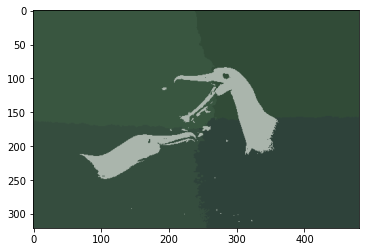

Image and her Groud truth


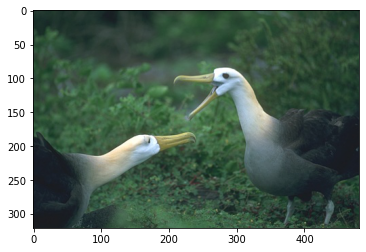

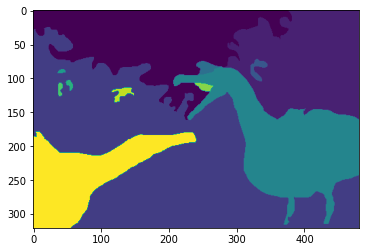

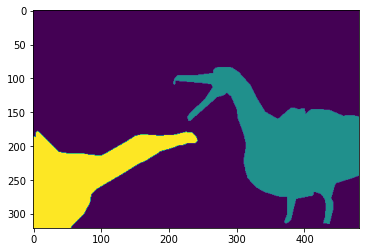

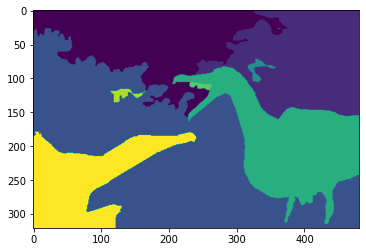

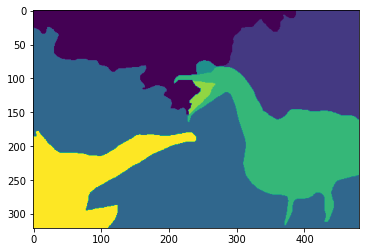

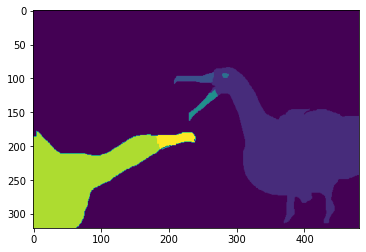

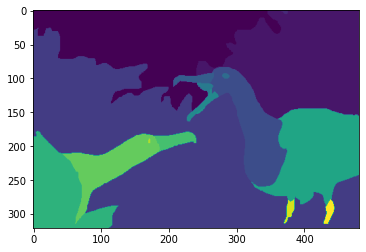

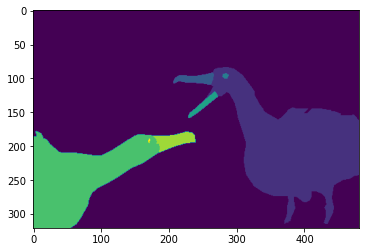

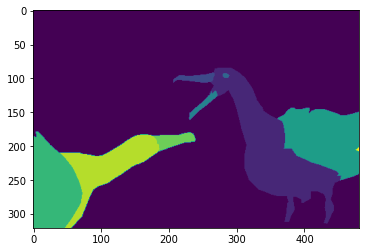

In [ ]:
index=8
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
colored,cluster=Kmeans(te_img[index],5,spatial=True)
print("After K-means by spatial layout")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

After K-means


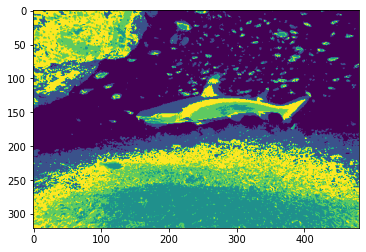

colored image


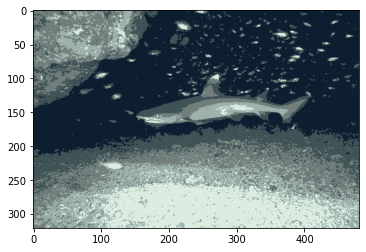

After K-means by spatial layout


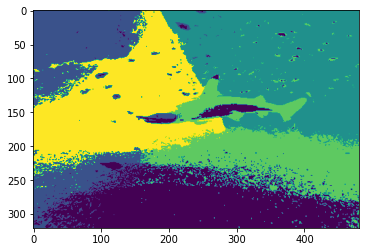

colored image


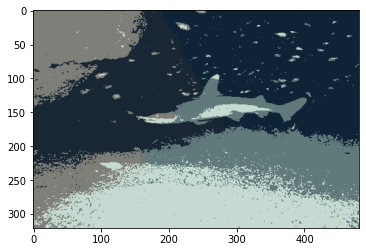

Image and her Groud truth


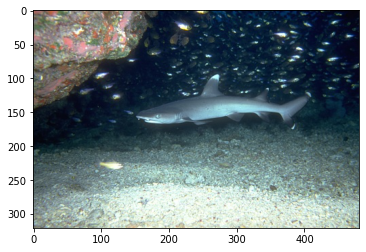

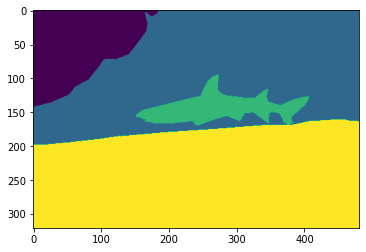

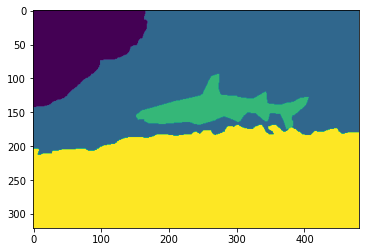

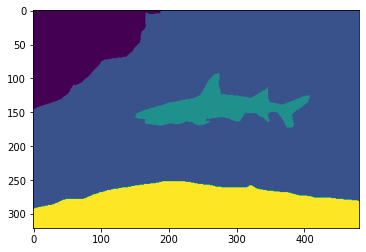

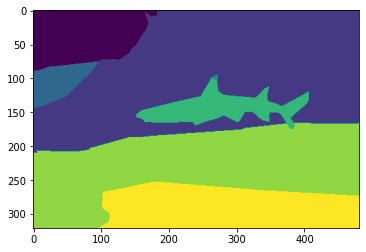

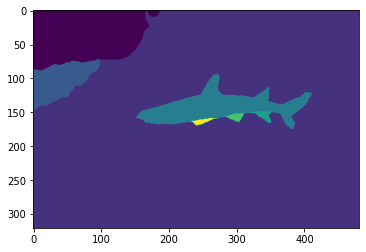

In [ ]:
index=137
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
colored,cluster=Kmeans(te_img[index],5,spatial=True)
print("After K-means by spatial layout")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((481, 321,3)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show()
  print("colored image")
  plt.imshow(colored.reshape((321, 481,3)))
  plt.show() 
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

## b-

In [ ]:
def Ncut (data,kn=3,K=3):
  data=data.reshape(-1, data.shape[-1])
  sim = kneighbors_graph(data, kn, mode='connectivity', include_self=False).toarray()
  print(sim.shape)
  Delta = np.diag(np.sum(sim, axis=1))
  L = Delta - sim
  La = np.dot(np.linalg.inv(Delta), L)
  eigen_values, eigen_vectors = np.linalg.eig(La)
  eigen_values, eigen_vectors = np.real(eigen_values), np.real(eigen_vectors)
  idx = np.argsort(eigen_values)
  eigen_values = eigen_values[idx]
  eigen_vectors = eigen_vectors[:,idx]
  U = eigen_vectors[:,range(K)]
  Y = preprocessing.normalize(eigen_vectors, norm='l2')
  return Kmeans(Y,K)

In [ ]:
def Normcut(img,kn,K):
  img=img.reshape(-1, img.shape[-1])
  clustering = SpectralClustering(n_clusters=K,assign_labels="kmeans",random_state=8,affinity='nearest_neighbors',n_neighbors =kn).fit(img)
  return clustering

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


After Normalized-cut


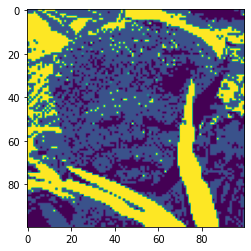

Image and her Groud truth


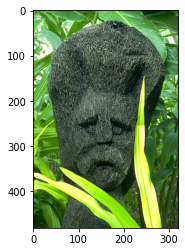

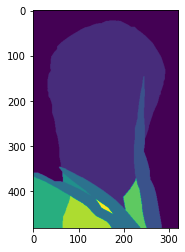

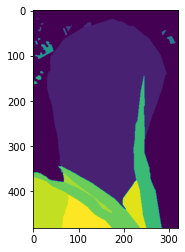

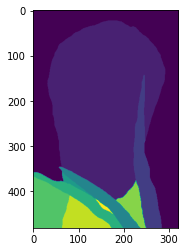

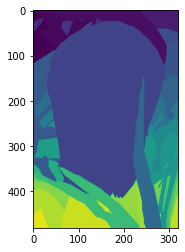

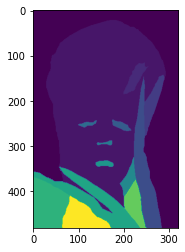

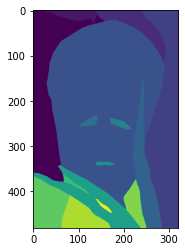

In [ ]:
index=5
img=deepcopy(te_img[index])
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
plt.imshow(clustering.labels_.reshape((100, 100)))
print("After Normalized-cut")
plt.show()
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


After Normalized-cut


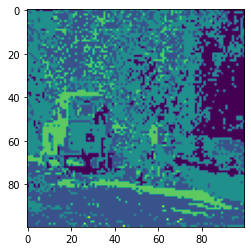

Image and her Groud truth


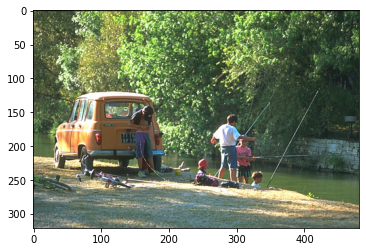

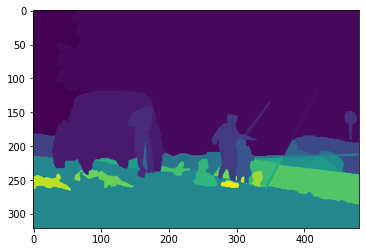

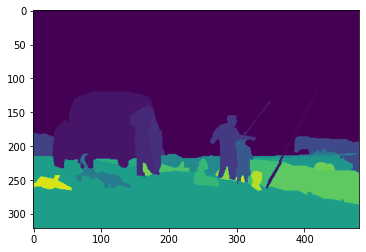

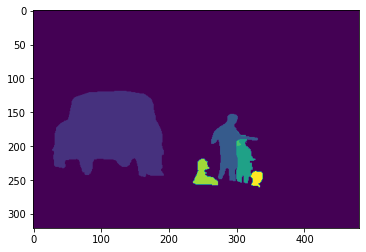

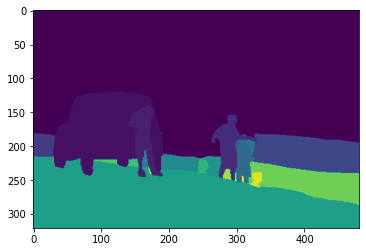

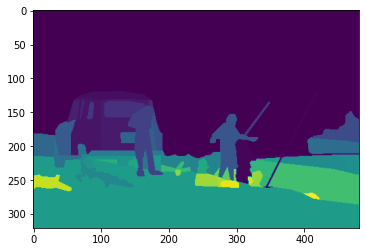

In [ ]:
index=6
img=deepcopy(te_img[index])
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
plt.imshow(clustering.labels_.reshape((100, 100)))
print("After Normalized-cut")
plt.show()
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

After Normalized-cut


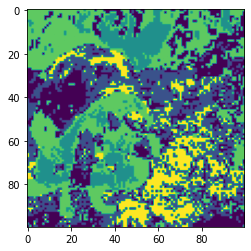

Image and her Groud truth


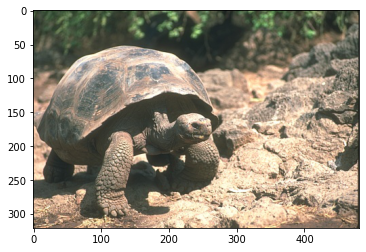

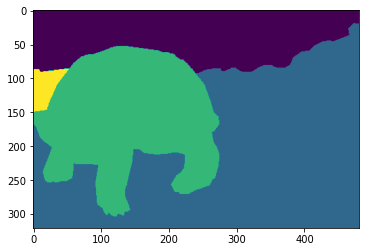

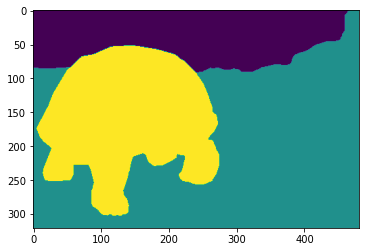

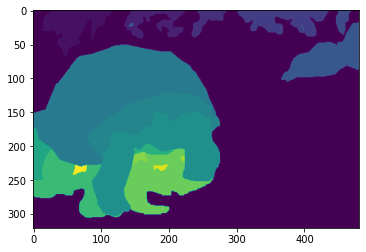

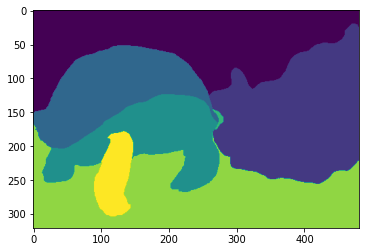

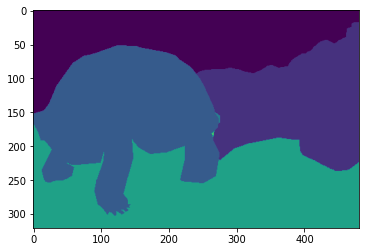

In [ ]:
index=7
img=deepcopy(te_img[index])
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
plt.imshow(clustering.labels_.reshape((100, 100)))
print("After Normalized-cut")
plt.show()
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


After Normalized-cut


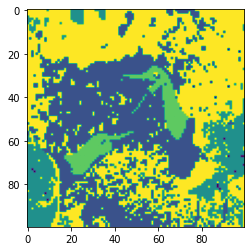

Image and her Groud truth


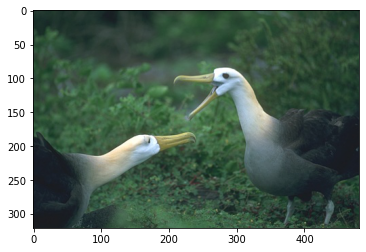

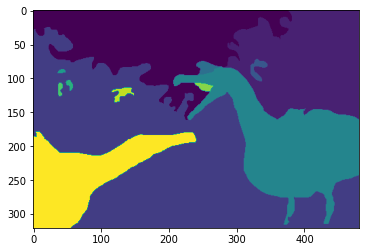

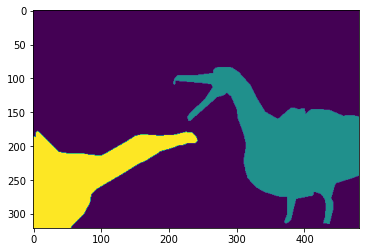

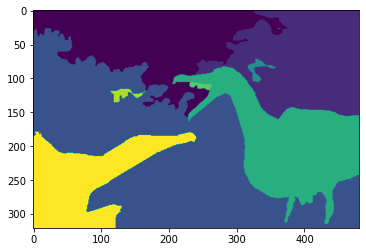

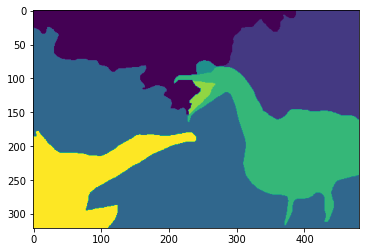

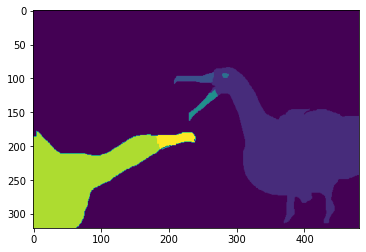

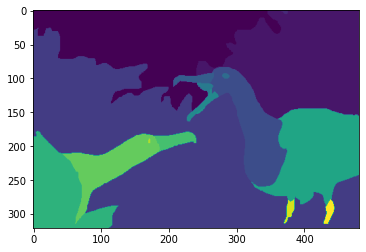

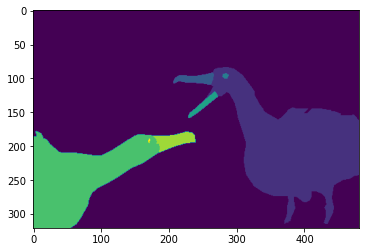

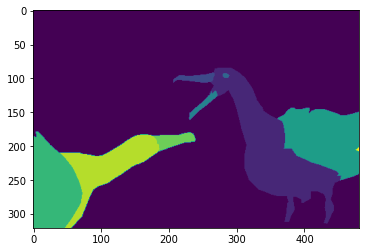

In [ ]:
index=8
img=deepcopy(te_img[index])
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
plt.imshow(clustering.labels_.reshape((100, 100)))
print("After Normalized-cut")
plt.show()
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

After Normalized-cut


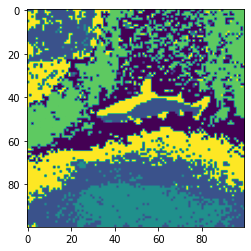

Image and her Groud truth


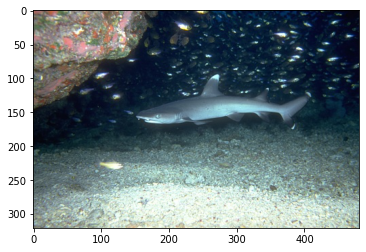

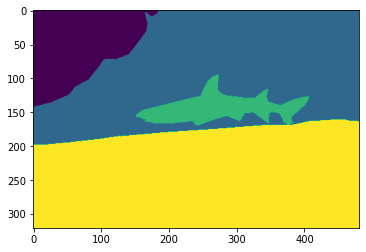

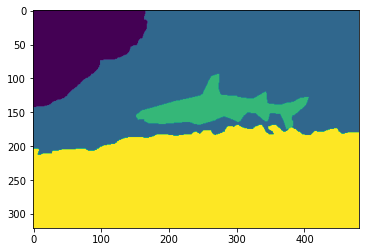

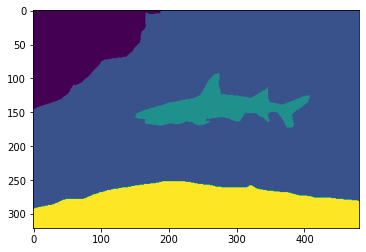

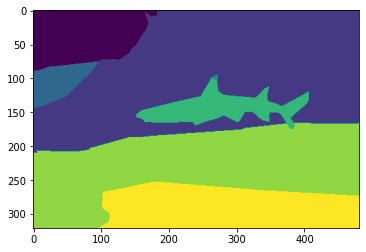

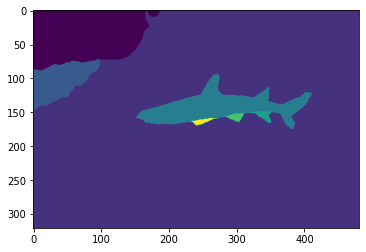

In [ ]:
index=137
img=deepcopy(te_img[index])
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
plt.imshow(clustering.labels_.reshape((100, 100)))
print("After Normalized-cut")
plt.show()
print("Image and her Groud truth")
ShowImageAndGroundTruth(te_img,te_gt,index)

## c-

image


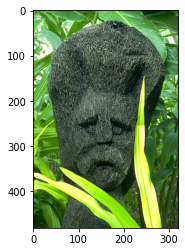

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


After Normalized-cut


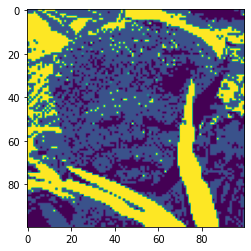

After K-means


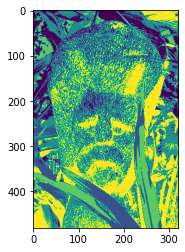

In [ ]:
index=5
img=deepcopy(te_img[index])
print("image")
plt.imshow(te_img[index])
plt.show()
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
print("After Normalized-cut")
plt.imshow(clustering.labels_.reshape((100, 100)))
plt.show()
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show() 

image


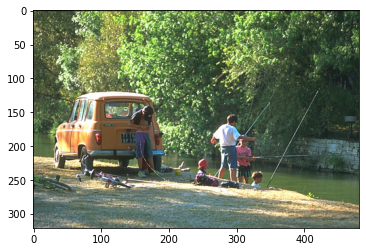

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


After Normalized-cut


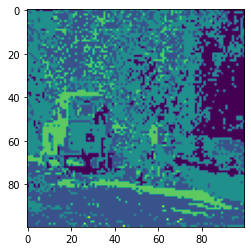

After K-means


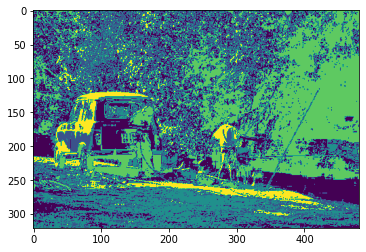

In [ ]:
index=6
img=deepcopy(te_img[index])
print("image")
plt.imshow(te_img[index])
plt.show()
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
print("After Normalized-cut")
plt.imshow(clustering.labels_.reshape((100, 100)))
plt.show()
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show() 

image


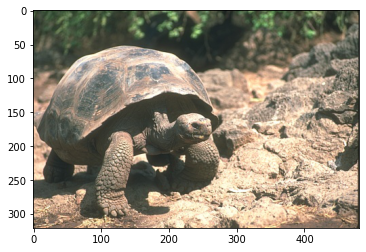

After Normalized-cut


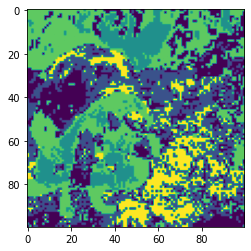

After K-means


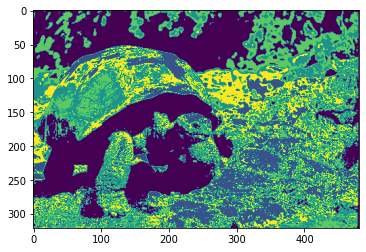

In [ ]:
index=7
img=deepcopy(te_img[index])
print("image")
plt.imshow(te_img[index])
plt.show()
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
print("After Normalized-cut")
plt.imshow(clustering.labels_.reshape((100, 100)))
plt.show()
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show() 

image


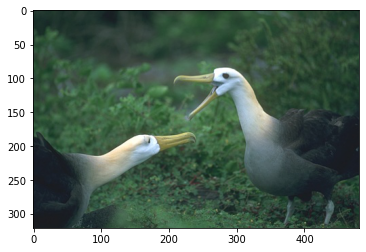

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


After Normalized-cut


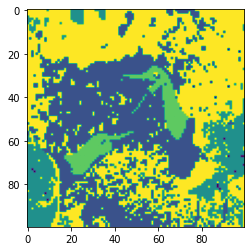

After K-means


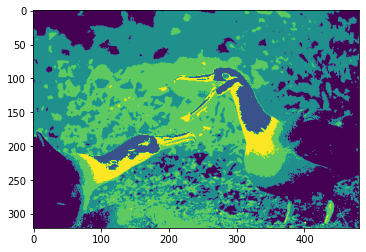

In [ ]:
index=8
img=deepcopy(te_img[index])
print("image")
plt.imshow(te_img[index])
plt.show()
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
print("After Normalized-cut")
plt.imshow(clustering.labels_.reshape((100, 100)))
plt.show()
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show() 

image


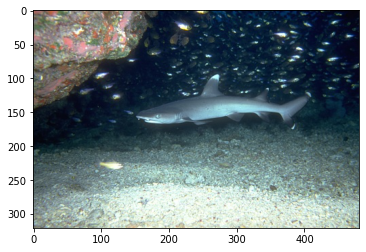

After Normalized-cut


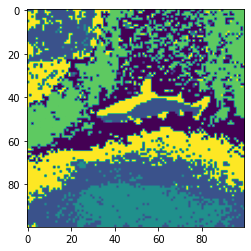

After K-means


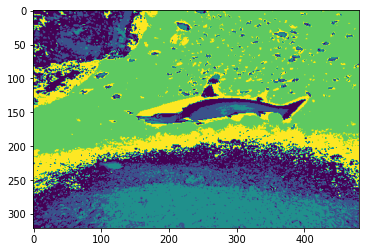

In [ ]:
index=137
img=deepcopy(te_img[index])
print("image")
plt.imshow(te_img[index])
plt.show()
img=cv2.resize(img, (100,100))
clustering=Normcut(img,5,5)
print("After Normalized-cut")
plt.imshow(clustering.labels_.reshape((100, 100)))
plt.show()
colored,cluster=Kmeans(te_img[index],5)
print("After K-means")
if te_img[index].shape[0]==481:
  plt.imshow(cluster.reshape((481, 321)))
  plt.show()
else :
  plt.imshow(cluster.reshape((321, 481)))
  plt.show() 